# Import Library and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('marketing_data.csv')

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain


# Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4    Income              2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.rename(columns={' Income ': 'Income'}, inplace=True)

In [ ]:
df = df[~df['Income'].isnull()]

In [ ]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'], format='%Y-%m-%d')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

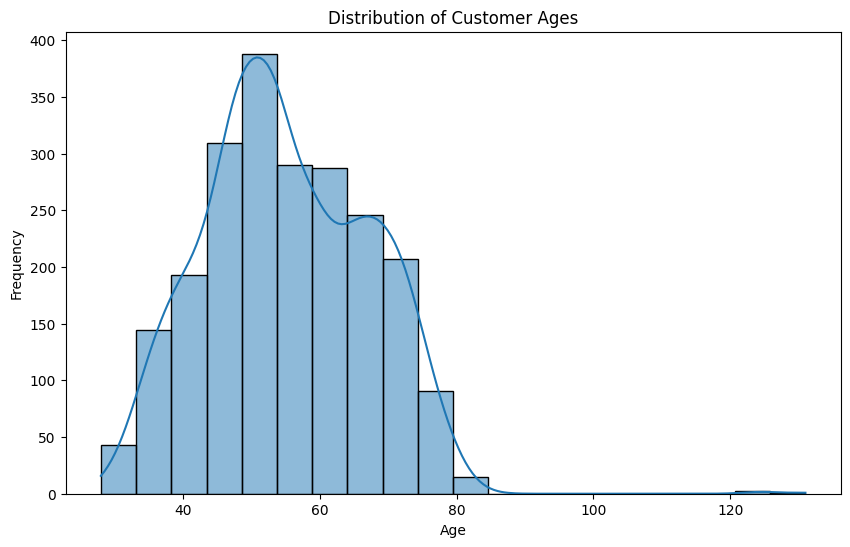

In [ ]:
current_year = 2024
df['Age'] = current_year - df['Year_Birth']

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# hapus data dengan Age > 90
df = df[df['Age'] <= 90]

In [ ]:
df.to_csv('marketing_data_cleaned.csv', index=False)

#Amount Spent per Marital Status

In [ ]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace(['YOLO', 'Alone', 'Absurd'], 'Single')
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow'], 'Divorced')
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together'], dtype=object)

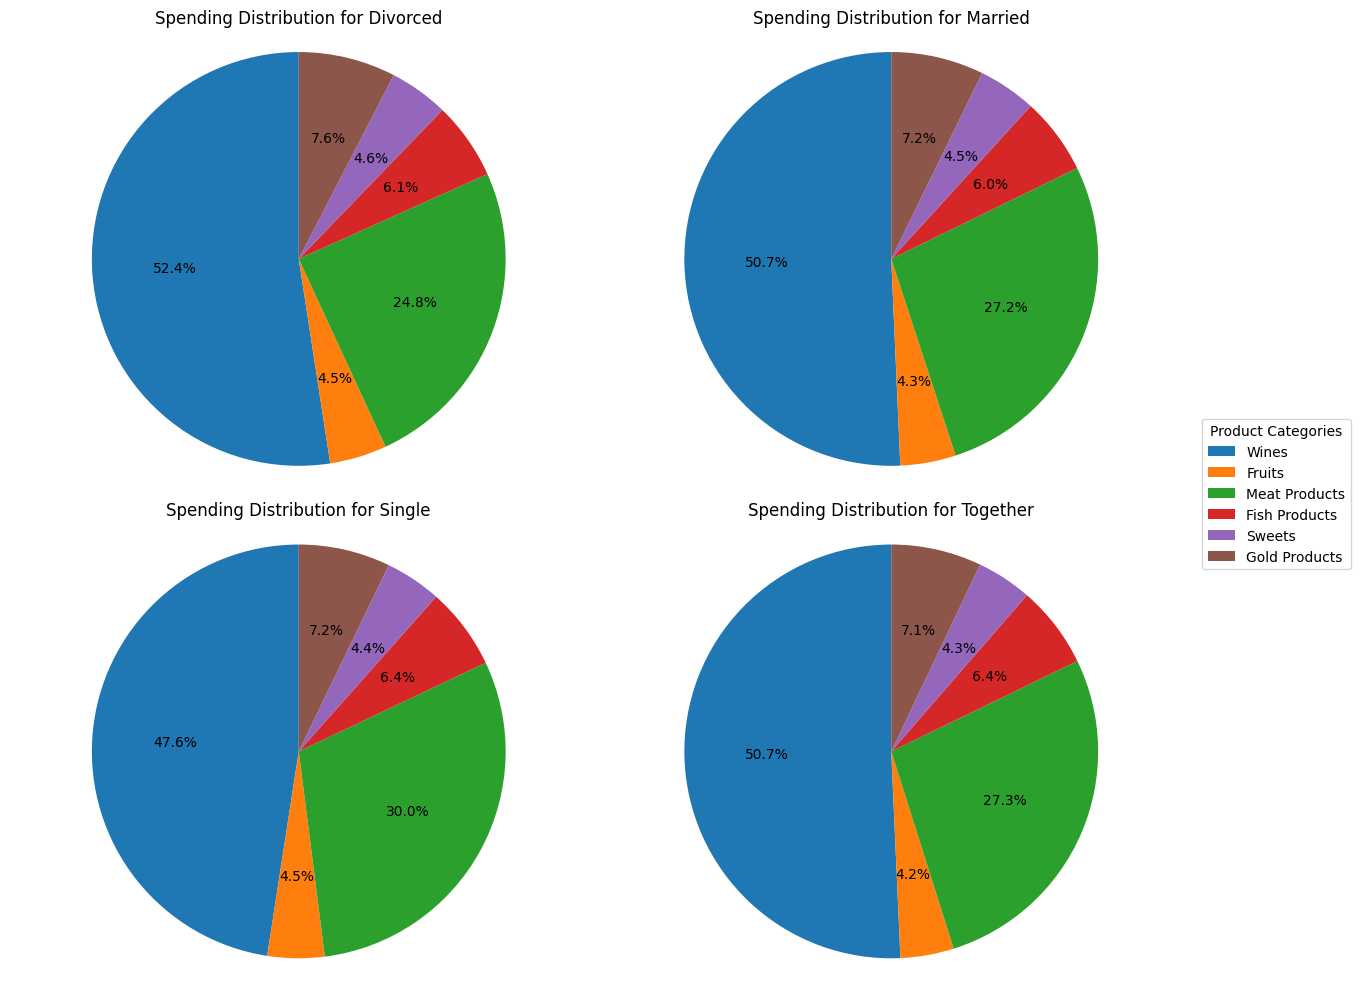

In [ ]:
marital_spending = df.groupby('Marital_Status')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

marital_spending = marital_spending.T
marital_spending.index = ['Wines', 'Fruits', 'Meat Products', 'Fish Products', 'Sweets', 'Gold Products']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, status in enumerate(marital_spending.columns[:4]):  # Adjust the range if needed
    wedges, texts, autotexts = axes[i].pie(
        marital_spending[status],
        autopct='%1.1f%%',
        startangle=90
    )
    axes[i].set_title(f'Spending Distribution for {status}')
    axes[i].axis('equal')  # Ensures the pie is drawn as a circle

# Adding a single legend to the right of the subplots
fig.legend(
    wedges, marital_spending.index, loc='center left', bbox_to_anchor=(1, 0.5), title='Product Categories'
)

# Adjusting layout to prevent overlapping
plt.subplots_adjust(left=0.05, right=0.75, top=0.9, bottom=0.1)  # Leave space for the legend on the right
plt.tight_layout()
plt.show()

#Purchasing Place by Age

In [ ]:
print(df['Age'].max())

84


In [ ]:
print(df['Age'].min())

28


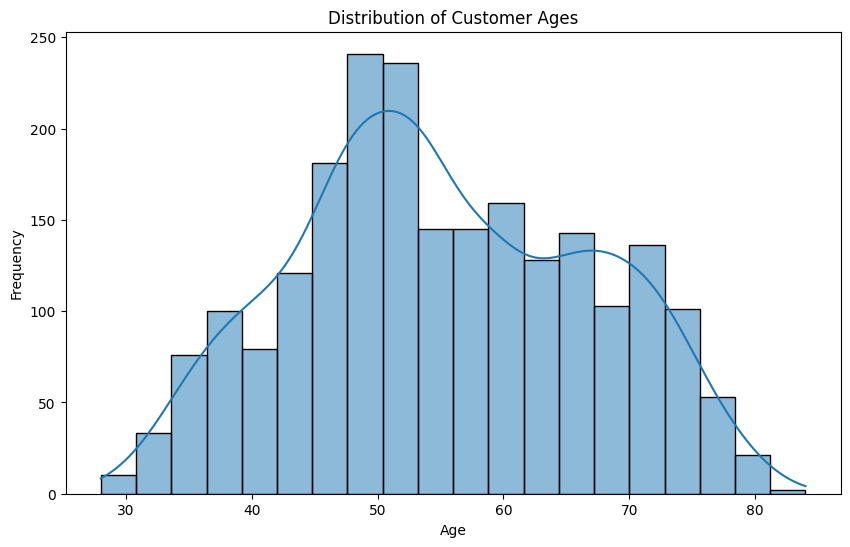

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
bins = [28, 54, 64, float('inf')]
labels = ['prime working age', 'mature working age', 'elderly']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

print(df[['Age', 'Age_Group']].head())

   Age           Age_Group
0   54  mature working age
1   63  mature working age
2   66             elderly
3   57  mature working age
4   35   prime working age


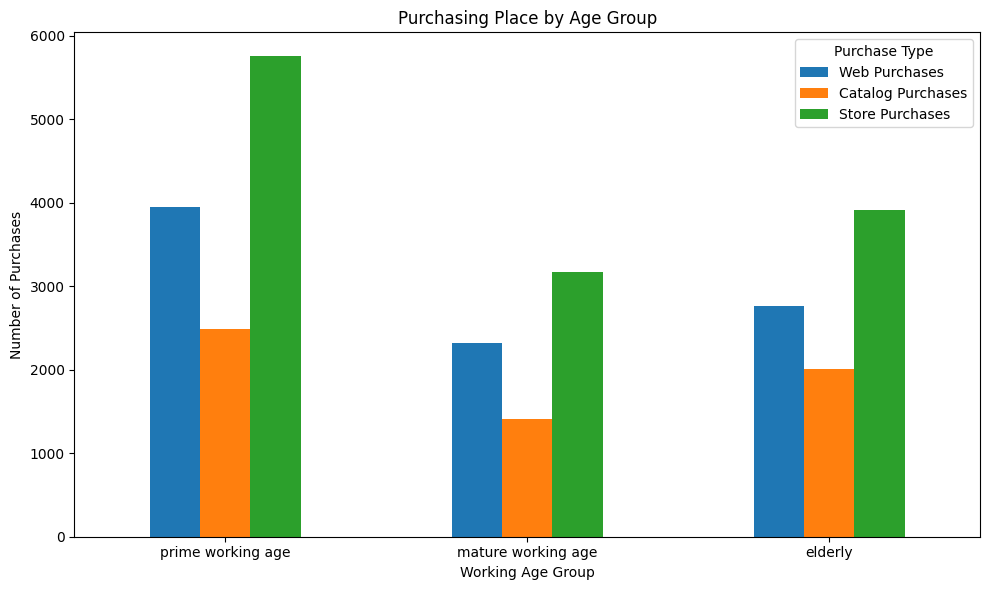

In [ ]:
age_purchases = df.groupby('Age_Group')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()
age_purchases.columns = ['Web Purchases', 'Catalog Purchases', 'Store Purchases']

age_purchases.plot(kind='bar', figsize=(10, 6))
plt.title('Purchasing Place by Age Group')
plt.xlabel('Working Age Group')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)
plt.legend(title='Purchase Type')
plt.tight_layout()
plt.show()


# Offer by Income

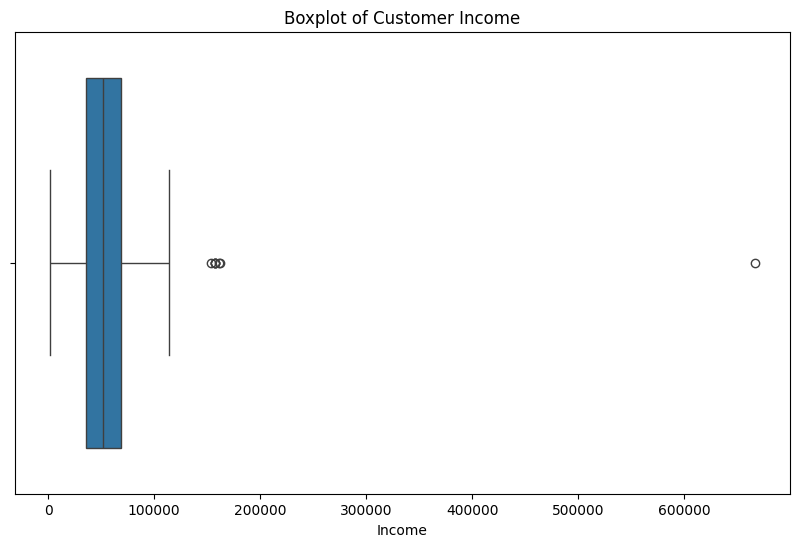

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Income'])
plt.title('Boxplot of Customer Income')
plt.xlabel('Income')
plt.show()

In [ ]:
df = df[df['Income'] <= 200000]

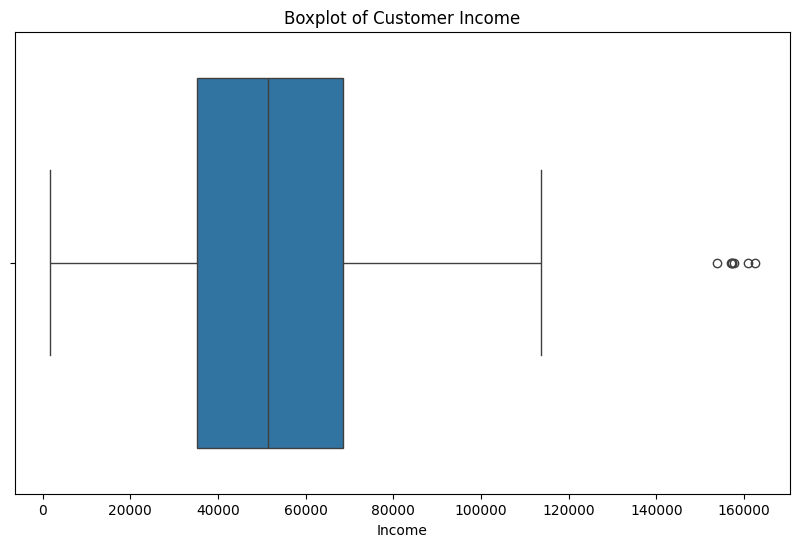

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Income'])
plt.title('Boxplot of Customer Income')
plt.xlabel('Income')
plt.show()

In [ ]:
income_bins = [0, 28007, 55000, 89744, 149131, float('inf')]
income_labels = ['Lower Class', 'Lower Middle Class', 'Middle Class', 'Upper Middle Class', 'Upper Class']

df['Income_Group'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, right=False)

print(df[['Income', 'Income_Group']].head())

    Income        Income_Group
0  84835.0        Middle Class
1  57091.0        Middle Class
2  67267.0        Middle Class
3  32474.0  Lower Middle Class
4  21474.0         Lower Class


In [ ]:
# prompt: make AcceptedCmp3, AcceptedCmp4, AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response as 1 column and change acceptedcmp3 as 3, acceptedcmp4 as 4 etc

# Assuming your DataFrame is named 'df' and the relevant columns exist

# Melt the DataFrame to combine the 'AcceptedCmp' columns into a single column
melted_df = pd.melt(df, id_vars=['Response'], value_vars=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'],
                    var_name='Campaign', value_name='Accepted')

# Extract the campaign number and convert it to numeric
melted_df['CampaignNumber'] = melted_df['Campaign'].str.extract('(\d+)').astype(int)

# Create the desired 'Campaign' column
melted_df['Campaign'] = melted_df['CampaignNumber']

# Drop the unnecessary 'CampaignNumber'
melted_df = melted_df.drop('CampaignNumber', axis = 1)

# Reorder columns
melted_df = melted_df[['Campaign', 'Accepted', 'Response']]

print(melted_df.head())

   Campaign  Accepted  Response
0         1         0         1
1         1         0         1
2         1         0         0
3         1         0         0
4         1         0         1


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming you have a DataFrame called df with the variables: income, AcceptedCmp1, AcceptedCmp2, ..., AcceptedCmp5, Response

# Select relevant columns for the logistic regression
X = df[['Income', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]  # Predictor: income
y = df['AcceptedCmp1']  # Response: whether they accepted the 1st campaign offer

# Add an intercept (constant) to the model
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the summary of the model
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.155669
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 2212
Model:                          Logit   Df Residuals:                     2205
Method:                           MLE   Df Model:                            6
Date:                Thu, 21 Nov 2024   Pseudo R-squ.:                  0.3469
Time:                        05:40:17   Log-Likelihood:                -344.34
converged:                       True   LL-Null:                       -527.25
Covariance Type:            nonrobust   LLR p-value:                 6.200e-76
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.9544      0.442    -15.717      0.000      -7.822      -6.087
Income        5.313e-05

# Purchasing Place by Country

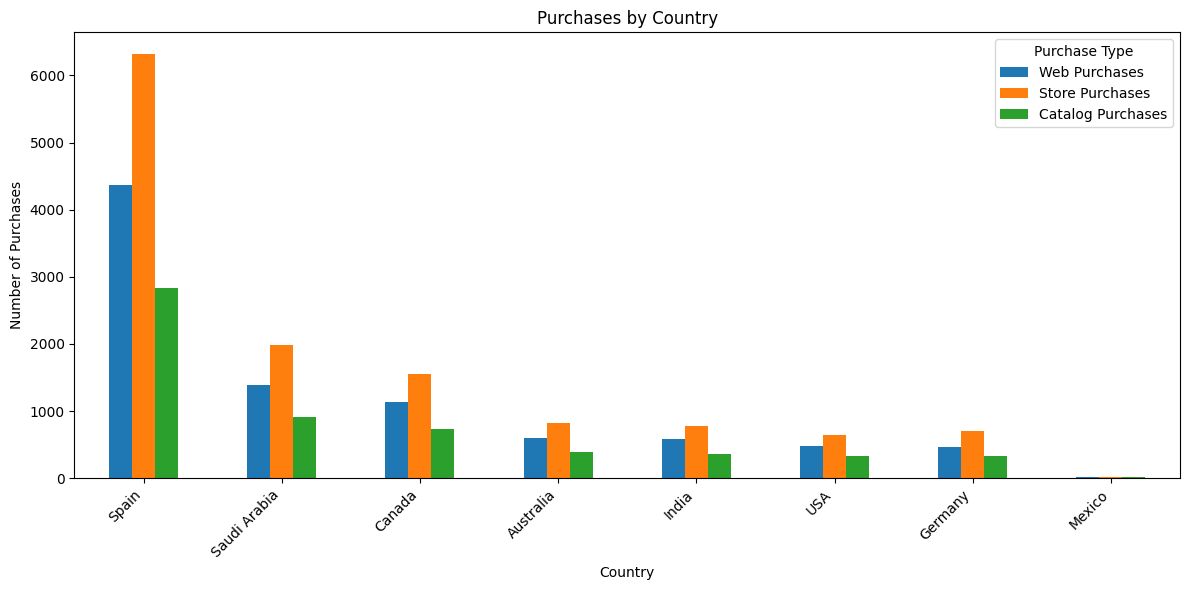

In [ ]:
# prompt: make plot country and NumWebPurchases NumStorePurchases NumCatalogPurchases. sort from the biggest NumCatalogPurchases in the left

country_purchases = df.groupby('Country')[['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']].sum()
country_purchases.columns = ['Web Purchases', 'Store Purchases', 'Catalog Purchases']
country_purchases = country_purchases.sort_values(by='Catalog Purchases', ascending=False)
country_purchases.plot(kind='bar', figsize=(12, 6))
plt.title('Purchases by Country')
plt.xlabel('Country')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Purchase Type')
plt.tight_layout()
plt.show()

# Amount Spent and Complain

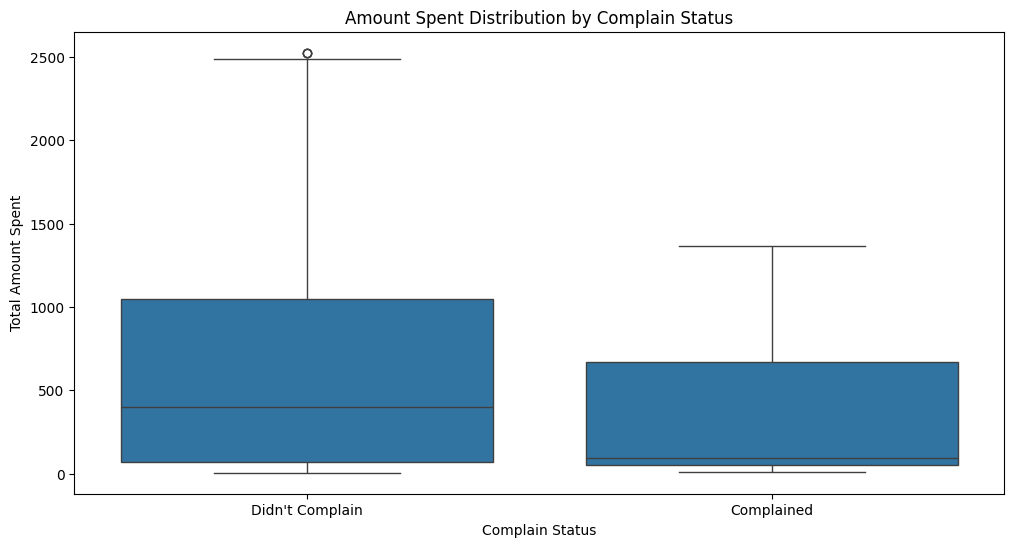

In [ ]:
df['TotalAmountSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Complain_Label'] = df['Complain'].map({0: "Didn't Complain", 1: "Complained"})

# Plot with the new labels
plt.figure(figsize=(12, 6))
sns.boxplot(x='Complain_Label', y='TotalAmountSpent', data=df)
plt.title('Amount Spent Distribution by Complain Status')
plt.xlabel('Complain Status')
plt.ylabel('Total Amount Spent')
plt.show()

# Membership Duration and Total Spending

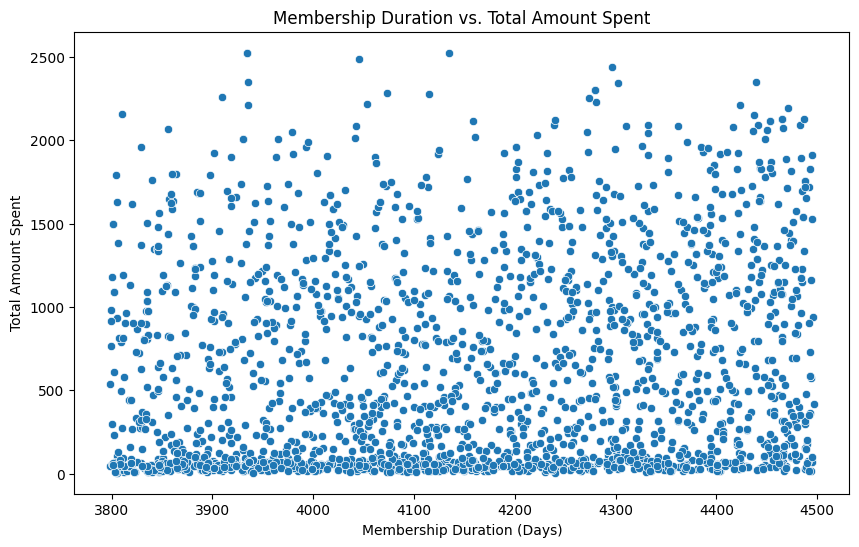

In [ ]:
import datetime

today = datetime.date.today()
df['Membership_Duration'] = (today - df['Dt_Customer'].dt.date).apply(lambda x: x.days)

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Membership_Duration', y='TotalAmountSpent', data=df)
plt.title('Membership Duration vs. Total Amount Spent')
plt.xlabel('Membership Duration (Days)')
plt.ylabel('Total Amount Spent')
plt.show()

In [ ]:
correlation = df['Membership_Duration'].corr(df['TotalAmountSpent'])
print(f"The correlation between membership duration and total amount spent is: {correlation}")

The correlation between membership duration and total amount spent is: 0.1585250101004746


# Number Purchases with Discount

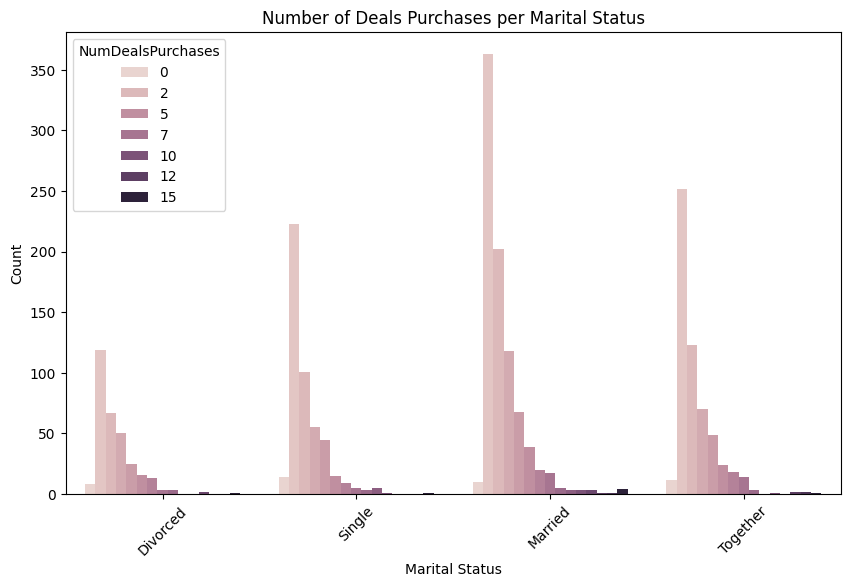

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', hue='NumDealsPurchases', data=df)
plt.title('Number of Deals Purchases per Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='NumDealsPurchases')
plt.show()

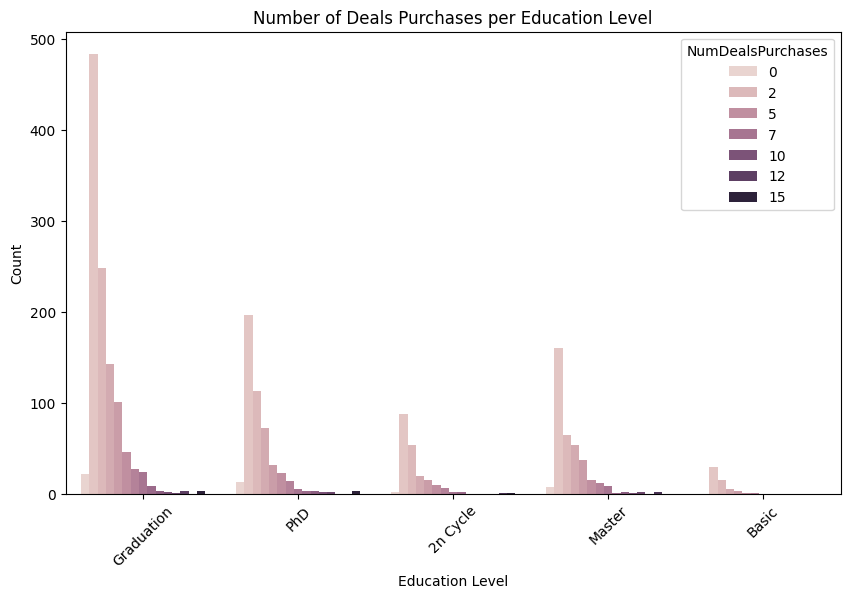

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='NumDealsPurchases', data=df)
plt.title('Number of Deals Purchases per Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='NumDealsPurchases')
plt.show()

# RFM Analysis

In [ ]:
!pip install pandas-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 69.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d9c8873c12128b881090575fd88286d45e6aaabb0fa5e264f81faae49dd51369
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display
import ipywidgets as widgets
from ydata_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
%matplotlib inline

In [ ]:
df['TotalPurchases'] = df['NumWebPurchases'] + df['NumStorePurchases'] + df['NumCatalogPurchases']

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Complain,Country,Age,Age_Group,Income_Group,TotalAmountSpent,Complain_Label,Membership_Duration,TotalPurchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,Spain,54,mature working age,Middle Class,1190,Didn't Complain,3811,14
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,1,0,Canada,63,mature working age,Middle Class,577,Didn't Complain,3812,17
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,USA,66,elderly,Middle Class,251,Didn't Complain,3845,10
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,Australia,57,mature working age,Lower Middle Class,11,Didn't Complain,3847,3
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,1,0,Spain,35,prime working age,Lower Class,91,Didn't Complain,3880,6


In [ ]:
# Create the rfm DataFrame with only the desired columns and renamed headers
rfm = df[['ID', 'Recency', 'TotalPurchases', 'TotalAmountSpent']].rename(columns={
    'Recency': 'Recency',
    'TotalPurchases': 'Frequency',
    'TotalAmountSpent': 'Monetary'
})

# Display the resulting rfm DataFrame
print(rfm)

         ID  Recency  Frequency  Monetary
0      1826        0         14      1190
1         1        0         17       577
2     10476        0         10       251
3      1386        0          3        11
4      5371        0          6        91
...     ...      ...        ...       ...
2235  10142       99         18       689
2236   5263       99          4        55
2237     22       99         12       309
2238    528       99         19      1383
2239   4070       99         17      1078

[2212 rows x 4 columns]


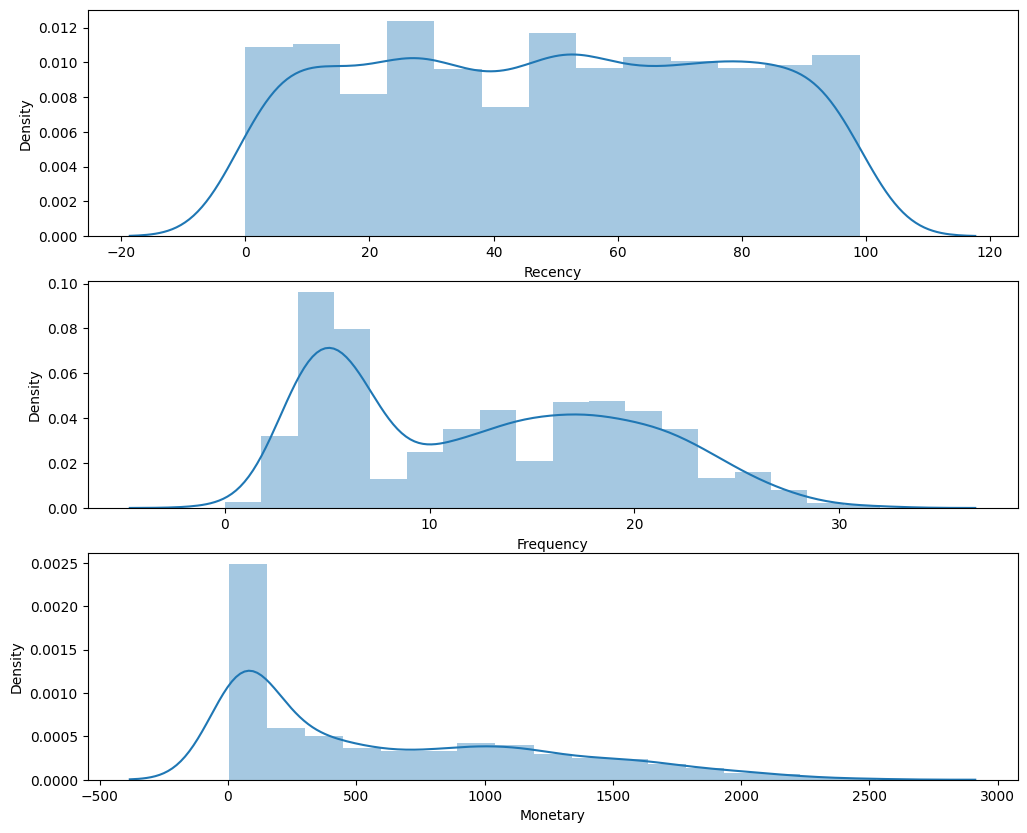

In [ ]:
plt.figure(figsize=(12,10))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(rfm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(rfm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(rfm['Monetary'])

# Show the plot
plt.show()

In [ ]:
rfm["R"] = pd.qcut(rfm["Recency"],5,labels=[5,4,3,2,1])

In [ ]:
rfm["F"] = pd.qcut(rfm["Frequency"],5,labels=[1,2,3,4,5])

In [ ]:
rfm["M"] = pd.qcut(rfm["Monetary"],5,labels=[1,2,3,4,5])

In [ ]:
rfm["RFM_Score"] = rfm["R"].astype(str) +rfm["F"].astype(str) + rfm["M"].astype(str)

In [ ]:
rfm.head()

,ID,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,1826,0,14,1190,5,3,5,535
1,1,0,17,577,5,4,3,543
2,10476,0,10,251,5,3,3,533
3,1386,0,3,11,5,1,1,511
4,5371,0,6,91,5,2,2,522


In [ ]:
rfm[rfm.RFM_Score == '111'].sort_values(by='Monetary',ascending=False)

,ID,Recency,Frequency,Monetary,R,F,M,RFM_Score
2236,5263,99,4,55,1,1,1,111
1870,8017,83,5,55,1,1,1,111
2033,4351,90,4,55,1,1,1,111
2073,7286,92,4,55,1,1,1,111
2120,4179,94,5,55,1,1,1,111
...,...,...,...,...,...,...,...,...
1866,6742,82,3,11,1,1,1,111
2156,10492,96,3,10,1,1,1,111
1805,4259,80,3,10,1,1,1,111
1925,11181,85,0,8,1,1,1,111


In [ ]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [ ]:
rfm['Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.sample(10)

,ID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
1808,2488,80,6,64,1,2,2,122,Hibernating
749,6421,32,20,2116,4,4,5,445,Loyal Customers
1153,5517,51,4,37,3,1,1,311,About to Sleep
2161,10500,96,7,98,1,2,2,122,Hibernating
82,4452,3,13,372,5,3,3,533,Potential Loyalists
1974,4478,87,18,653,1,4,4,144,At Risk
1387,2061,61,6,99,2,2,2,222,Hibernating
1236,3433,54,20,981,3,4,4,344,Loyal Customers
252,6404,10,11,282,5,3,3,533,Potential Loyalists
1235,6583,54,20,981,3,4,4,344,Loyal Customers


In [ ]:
rfm.head()

,ID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
0,1826,0,14,1190,5,3,5,535,Potential Loyalists
1,1,0,17,577,5,4,3,543,Champions
2,10476,0,10,251,5,3,3,533,Potential Loyalists
3,1386,0,3,11,5,1,1,511,New Customers
4,5371,0,6,91,5,2,2,522,Potential Loyalists


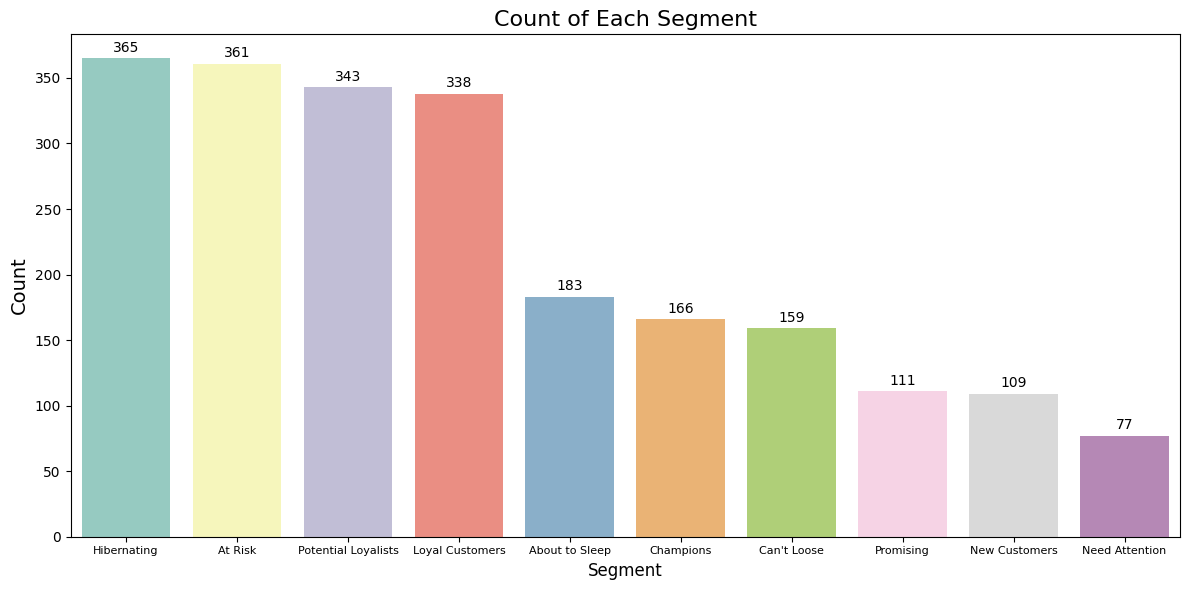

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the segments by count in descending order
segment_counts = rfm['Segment'].value_counts().sort_values(ascending=False)

# Plot the sorted bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="Set3")

# Add title and labels
plt.title('Count of Each Segment', fontsize=16)
plt.xlabel('Segment', fontsize=12)  # Smaller font size for x-axis label
plt.ylabel('Count', fontsize=14)

# Add count labels on each bar
for i, count in enumerate(segment_counts.values):
    plt.text(i, count + 5, str(count), ha='center', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(fontsize=8)  # Adjust fontsize for x-axis ticks
plt.tight_layout()  # Ensure everything fits nicely
plt.grid(False)
plt.show()


In [ ]:
df['Segment']=rfm['Segment']

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Country,Age,Age_Group,Income_Group,TotalAmountSpent,Complain_Label,Membership_Duration,TotalPurchases,Segment
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,Spain,54,mature working age,Middle Class,1190,Didn't Complain,3811,14,Potential Loyalists
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,Canada,63,mature working age,Middle Class,577,Didn't Complain,3812,17,Champions
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,USA,66,elderly,Middle Class,251,Didn't Complain,3845,10,Potential Loyalists
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,Australia,57,mature working age,Lower Middle Class,11,Didn't Complain,3847,3,New Customers
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,Spain,35,prime working age,Lower Class,91,Didn't Complain,3880,6,Potential Loyalists


In [ ]:
df.to_csv('marketing_data_cleaned_rfm.csv', index=False)